# Машинное обучение

Мы представляем проект для сети фитнес-центров «Культурист-датасаентист», которая разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он еще вернется после отпуска, командировки или отсутствия по другой причине. Однако чаще бывает наоборот: если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

**Цель исследования** - провести анализ и подготовить план действий по удержанию клиентов.

**Задачи исследования**:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

**Ход исследования**

Для анализа мы используем данные, которые содержат характеристики клиента, характер его активности на месяц до оттока и факт оттока на определённый месяц. Данные содержатся в csv-файле.

О качестве данных нам ничего неизвестно, поэтому перед проведением исследования понадобится обзор и предобработка данных: обработаем пропуски и дубликаты в случае наличия, приведем данные к необходимым типам, проведем дополнительные расчеты.

Затем мы проведем исследовательский анализ, оценим средние значения и стандартные отклонения показателей, сравним группы ушедших и осташихся клиентов, подготовим матрицу корреляции признаков. 

После этого - построим модель прогнозирования оттока клиентов. Для этого разобьем данные на обучающую и валидационную выборку, обучим модели двумя способами (логистическая регрессия и случайный лес), оценим метрики качества моделей и выберем лучшую.

Потом проведем кластеризацию клиентов. Оценим характеристики признаков для конкретных кластеров, посчитаем долю оттока внутри кластеров.

Наконец, сформулируем выводы и сделаем базовые рекомендации по работе с клиентами.

Таким образом, решение пройдет в пять этапов.

## Обзор и предобработка данных

### Обзор данных

Составим представление о данных. Импортируем специальную библиотеку pandas для обработки и анализа данных, а также другие необходимые для выполнения проекта объекты. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт части библиотеки matplotlib для работы с диаграммами
import seaborn as sns # импорт библиотеки seaborn для работы с диаграммами
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

Прочитаем файл `/datasets/gym_churn.csv`, сохраним в переменную data, а также выведем на экран начало таблицы.

In [2]:
# чтение файла с данными и сохранение в data
try:
    # адрес в среде 'practicum'
    data = pd.read_csv('/datasets/gym_churn.csv')  
except:
    # адрес в локальном окружении
    data = pd.read_csv('gym_churn.csv')
# получение первых 5 строк таблицы
display(data.head(5)) 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Получим общую информацию о таблице. 

In [3]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Таблица `data` (данные о пользователях фитнесс-клуба)
Каждая запись - это данные по одному клиенту: данные за предыдущей до проверки факта оттока месяц, информация на основе журнала посещения и покупок, факт оттока в текущем месяце.

В таблице 14 столбцов. Согласно документации к данным: 

Данные по клиенту, тип данных - int64:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` —  сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год), формат int64;
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах), формат float64;
* `Group_visits` — факт посещения групповых занятий, формат int64;
* `Avg_class_frequency_total` —  средняя частота посещений в неделю за все время с начала действия абонемента, формат float64;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц, формат float64;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон, формат float64.

Факт оттока в текущем месяце:
* `Churn` — факт оттока, формат int64.

В таблице 4 000 значений в каждом столбце, скорее всего пропущенных значений нет.
Названия всех столбцов необходимо привести к хорошему стилю.

**Выводы**

Данные для анализа содержатся в таблице data, они включают информацию об активности посетителей фитнес-клуба, их характеристиках и факте оттока. Для достижения целей исследования необходимо будет провести предобработку: привести названия столбцов к хорошему стилю и убедиться в качестве данных. 

Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Приведение названий столбцов к хорошему стилю

Заменим названия столбцов в таблице data - приведем к snake_case - нижний регистр с нижними поджчеркиваниями.

In [4]:
# Переименование столбцов
data.columns = data.columns.str.lower()
# Проверка - вывод названий столбцов
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Теперь названия столбцов в порядке. 

### Проверка данных на аномалии и дубликаты

Определим, есть ли в таблице data пропуски.

In [5]:
# Запрос количества пропущенных значений по столбцам.
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

В таблицe, как мы и предположили, отсутствуют пропуски.

Теперь проверим таблицу на явные дубликаты.

In [6]:
# Запрос количества явных дубликатов
data.duplicated().sum()

0

В таблице явных дубликатов нет. 

### Расчет дополнительного столбца

Мы имеем сведения об общем среднем количестве посещений в неделю и аналогичные данные за последний месяц, можем вывести разницу в посещениях. 

In [7]:
# Расчет показателя
data.insert(13, 'frequency_difference', data['avg_class_frequency_current_month']-data['avg_class_frequency_total'])
# Проверка - просмотр первых пяти строк таблицы
data.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,frequency_difference,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,-0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,-0.012693,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,-0.122596,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0.151582,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0.006194,0


Мы проверили данные на пропущенные значения и дубликаты, подтвердили высокое качество имеющихся данных и можем приступать к дальнейшему анализу

## Исследовательский анализ данных

Проанализируем средние значения и стандартные отклонения по выборке в целом, сравним признаки в двух группах - ушедших и оставшихся клиентов, а также построим матрицу корреляции между признаками.

### Общая информация о клиентах

Рассмотрим данные: есть ли среди анализируемых признаков недостаточно представленные, каковы средние значения и стандартные отклонения по имеющимся признакам.

In [8]:
# Описание основных характеристик распределения признаков
display(data.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,frequency_difference,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,-0.111968,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.321350,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,-1.856764,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,-0.141110,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,-0.022433,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,0.056744,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.060218,1.000000


Первичный анализ позволяет сделать ряд промежуточных выводов:
- гендерный состав клиентов достаточно однородный - 51% составляют женщины, 
- по возрасту клиенты скорее молодые - средий возраст - 29 лет, представлены клиенты от 18 до 41 года,
- 84% клиентов имеют работу/дом недалеко от клуба, 90% клиентов оставили контактный телефон, эти признаки в связи со своей распространенностью скорее всего не будут важными в построении модели - они не разделяют группу, а присущи практически всем ее членам,
- маркетинговые активности помогают привлекать клиентов: около 49% клиентов - работники организаций-партнеров, 31% участвовали в акции "Приведи друга".

По активности клиентов в клубе можно сделать следующие выводы:
- групповые занятия посещает около половины клиентов клуба (скорее всего, есть гендерная разница),
- дополнительные траты в фитнес-клубе относительно небольшие, среднее значение 146 единиц при стандартном отклонении в 96,
- среднее количество посещений клуба - чуть меньше 2,
- клиенты склонны заключать кратковременные контракты, более половины имеет месячное членство,
- у клиентов достаточно небольшой срок непрерывного пользования (лайфтайм) - в среднем 4 месяца, при этом более 75% клиентов занимаются в клубе менее 6 месяцев, хотя клуб функционирует давно - есть клиенты с 31 месяцем лайфтайма.

Общий уровень оттока - около 27%.


Сравним характеристики ушедших и оставшихся клиентов.

### Остающиеся и уходящие клиенты: основные различия

Рассмотрим средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался. 

In [9]:
# Группировка данных по столбцу churn, вычисление среднего
churn_table = data.groupby(by='churn').mean()
# Удаление индекса - для построения графиков
churn_table.reset_index(inplace=True)
# Демонстрация таблицы
display(churn_table)

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,frequency_difference
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.003006
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,-0.430449


Мы подготовили таблицу, лучше всего визуализировать полученные результаты, чтобы увидеть, по каким показателям есть существенные различия между группами оставшихся и ушедших клиентов.

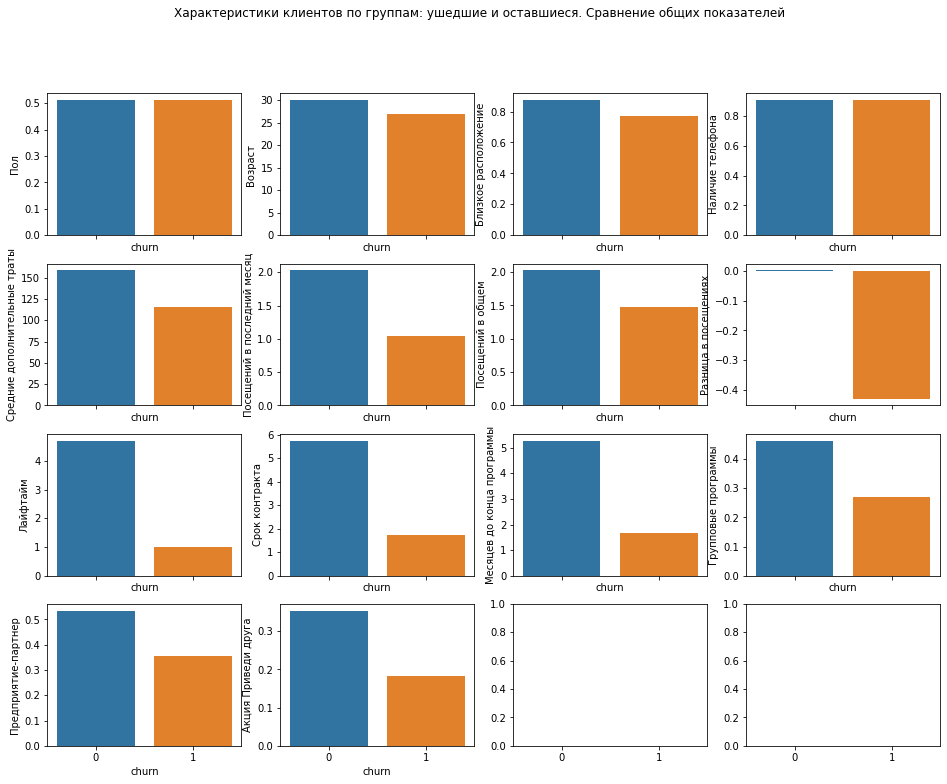

In [10]:
# Определение количества графиков, их расположения, размера фигуры
fig, axes = plt.subplots(4, 4, sharex=True, figsize=(16,12))
# Название графиков
fig.suptitle('Характеристики клиентов по группам: ушедшие и оставшиеся. Сравнение общих показателей')
# Построение графиков по сводной таблице
sns.barplot(ax=axes[0,0], x = 'churn', y = 'gender', data=churn_table).set(ylabel = 'Пол')
sns.barplot(ax=axes[0,1], x = 'churn', y = 'age', data=churn_table).set(ylabel = 'Возраст')
sns.barplot(ax=axes[0,2], x = 'churn', y = 'near_location', data=churn_table).set(ylabel = 'Близкое расположение')
sns.barplot(ax=axes[0,3], x = 'churn', y = 'phone', data=churn_table).set(ylabel = 'Наличие телефона')

sns.barplot(ax=axes[1,0], x = 'churn', y = 'avg_additional_charges_total', data=churn_table).set(ylabel = 'Средние дополнительные траты')
sns.barplot(ax=axes[1,1], x = 'churn', y = 'avg_class_frequency_current_month', data=churn_table).set(ylabel = 'Посещений в последний месяц')
sns.barplot(ax=axes[1,2], x = 'churn', y = 'avg_class_frequency_total', data=churn_table).set(ylabel = 'Посещений в общем')
sns.barplot(ax=axes[1,3], x = 'churn', y = 'frequency_difference', data=churn_table).set(ylabel = 'Разница в посещениях')

sns.barplot(ax=axes[2,0], x = 'churn', y = 'lifetime', data=churn_table).set(ylabel = 'Лайфтайм')
sns.barplot(ax=axes[2,1], x = 'churn', y = 'contract_period', data=churn_table).set(ylabel = 'Срок контракта')
sns.barplot(ax=axes[2,2], x = 'churn', y = 'month_to_end_contract', data=churn_table).set(ylabel = 'Месяцев до конца программы')
sns.barplot(ax=axes[2,3], x = 'churn', y = 'group_visits', data=churn_table).set(ylabel = 'Групповые программы')

sns.barplot(ax=axes[3,0], x = 'churn', y = 'partner', data=churn_table).set(ylabel = 'Предприятие-партнер')
sns.barplot(ax=axes[3,1], x = 'churn', y = 'promo_friends', data=churn_table).set(ylabel = 'Акция Приведи друга')
# Демонстрация графика
plt.show()

По признакам, для которых это возможно, построим гистограммы. 

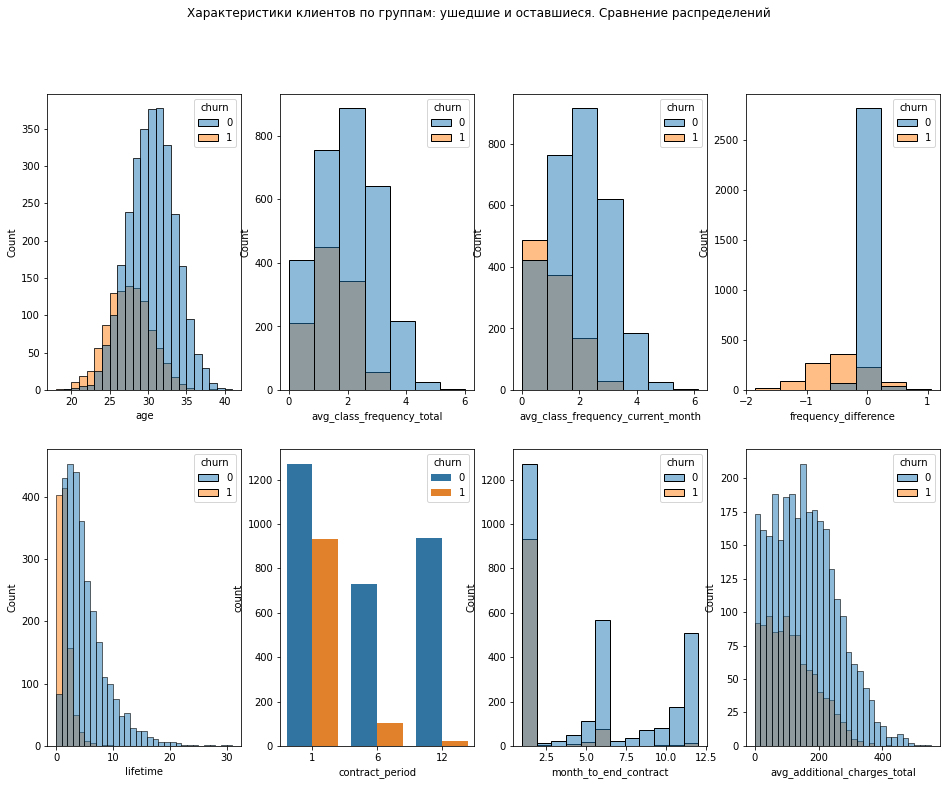

In [11]:
# Определение количества графиков, их расположения, размера фигуры
fig, axes = plt.subplots(2, 4, sharex=False, figsize=(16,12))
# Название графиков
fig.suptitle('Характеристики клиентов по группам: ушедшие и оставшиеся. Сравнение распределений')
# Построение графиков по общей таблице с данными
sns.histplot(ax=axes[0,0], x='age', hue='churn', data=data, bins=23)
sns.histplot(ax=axes[0,1], x='avg_class_frequency_total', hue='churn', data=data, bins = 7)
sns.histplot(ax=axes[0,2], x='avg_class_frequency_current_month', hue='churn', data=data, bins = 7)
sns.histplot(ax=axes[0,3], x='frequency_difference', hue='churn', data=data, bins = 7)

sns.histplot(ax=axes[1,0], x='lifetime', hue ='churn', data=data, bins=31)
sns.countplot(ax=axes[1,1], x='contract_period', hue='churn', data=data)
sns.histplot(ax=axes[1,2], x='month_to_end_contract', hue='churn', data=data, bins=12)
sns.histplot(ax=axes[1,3], x='avg_additional_charges_total', hue='churn', data=data) 
# Демонстрация графиков
plt.show()

Анализ таблицы и графической информации демонстрирует: 
1. показатели, по которым разница между группами отсутствует или незначительная: пол, наличие телефона, возраст,близкое расположение клуба к офису/дому,
2. показатели с заметной разницей между группами: траты в клубе, общее количество посещений и количество посещений в последний месяц, участие в групповых программах, участие в акциях с предприятием партнером и "Приведи друга",
3. показатели с очень большой разницей между группами: лайфтайм, срок контракта и и количество месяцев до окончания контракта.

### Матрица корреляции

Построим матрицу корреляций и отобразим её.

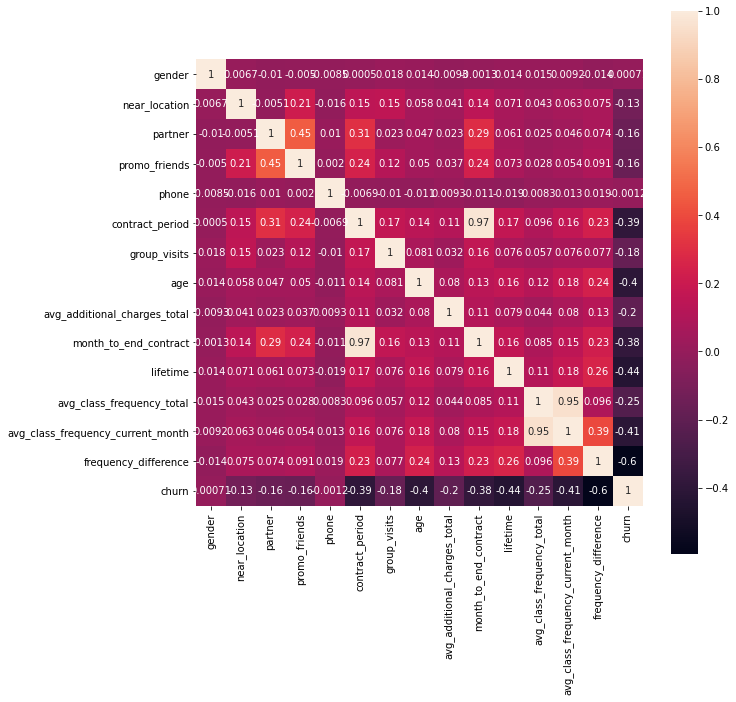

In [12]:
cm = data.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(10,10))

# тепловая карта с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)
ax.set_ylim(
    15, 0
)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

Убедимся, что отбрасывая старые данные мы не потеряли слишком много событий и пользователей. 

Матрица корреляции показываает, что есть ряд показателей с высокой корреляцией с оттоком клиентов:
- разница в частоте посещения клуба, 
- лайфтайм, 
- средняя частота посещения клуба,
- возраст,
- срок контракта, 
- число месяцев до окончания контракта.
Однако в данных мы видим и мультиколлинеарность - наличие значительной зависимости между объясняющими переменными. 

Можно попробовать удалить из анализа переменные, имеющие слишком малый вес и имеющие очень высокую корреляцию с иными переменными. Тогда в качестве действующих признаков останутся frequency_difference, lifetime, avg_class_frequency_total, age, contract_period, partner, promo_friends, group_visits,avg_additional_charges_total. Подготовим такой датасет.

In [13]:
data_selected = data [['frequency_difference', 'lifetime', 'avg_class_frequency_total', 
                      'age', 'contract_period', 'partner', 'promo_friends', 'group_visits',
                      'avg_additional_charges_total', 'churn']]
data_selected.head()

,frequency_difference,lifetime,avg_class_frequency_total,age,contract_period,partner,promo_friends,group_visits,avg_additional_charges_total,churn
0,-0.020398,3,0.020398,29,6,1,1,1,14.227470,0
1,-0.012693,7,1.922936,31,12,0,0,1,113.202938,0
2,-0.122596,2,1.859098,28,1,1,0,0,129.448479,0
3,0.151582,2,3.205633,33,12,1,1,1,62.669863,0
4,0.006194,3,1.113884,26,1,1,1,0,198.362265,0


Проверим, как теперь выглядит матрица корреляции

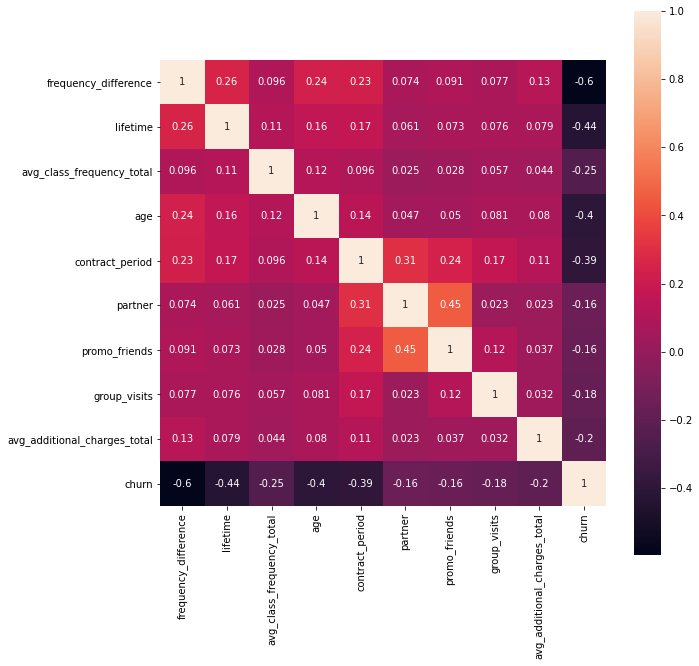

In [14]:
cm_selected = data_selected.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(10,10))

# тепловая карта с подписями для матрицы корреляций
sns.heatmap(cm_selected, annot=True, square=True)
ax.set_ylim(
    10, 0
)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

Попытаемся сократить мультиколлинеарность, используя для анализа данные по ограниченному количеству признаков - data_limited.

**Вывод**

Мы провели исследовательский анализ данных: 
- оценили общий уровень признаков - у многих клиентов короткий лайфтайм, клиенты часто заключают контракты на короткие сроки, 
- сравнили ушедших и оставшихся клиентов: ушедшие клиенты моложе, реже посещают групповые программы и клуб в целом, реже участвуют в маркетинговых активностях,
- составили матрицу корреляции - сильнее всего взаимосвязь оттока с такими признаками, как частота посещения клуба, срок и длительность контракта и возраст клиента.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Для этого разобьем данные на обучающую и валидационную выборку, обучим модель, оценим метрики моделей и сравним их.

### Разделение данных на обучающую и валидационную выборки

Разобьем данные на обучающую и валидационную выборку функцией train_test_split().

In [15]:
X = data_selected.drop(columns=['churn'])
y = data_selected['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем данные для работы

In [16]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для валидационной выборки
X_test_st = scaler.transform(X_test)

Теперь данные готовы для обучения модели.

### Подготовка функций

Обучим модель на тренировочной выборке двумя способами:
- логистической регрессией,
- случайным лесом.

In [17]:
# Создание списка моделей
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(n_estimators = 100, random_state=0),
]

Модели мы будем сравнивать по следующим метрикам: 
- доля правильных ответов (accuracy),
- точность - доля правильных ответов среди целевого класса (precision),
- полнота - доля реальных объектов целевого класса, обнаруженных с помощью модели (recall),
- баланс между точностью и полнотой (f1_score).

Определим функцию, которая будет принимать модель и выборки, а выводить метрики качества модели.

In [18]:
# Определение функции
def make_predictions(m, X_train, y_train, X_test, y_test):
    model = m
    # Обучение модели
    model.fit(X_train, y_train)
    # Расчет прогноза
    predictions = model.predict(X_test)
  #  print(predictions)
    # Расчет вероятностей
    probabilities = model.predict_proba(X_test)[:, 1]
    print (f'Метрики классификации для модели {model}')
    print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
    print(f'Precision: {precision_score(y_test, predictions):.2f}')
    print(f'Recall: {recall_score(y_test, predictions):.2f}')
    print(f'F1 score: {f1_score(y_test, predictions):.2f}')
    print(f'ROC AUC: {roc_auc_score(y_test, probabilities):.2f}')    

### Обучение и сравнение моделей

Оценим метрики accuracy, precision, recall и f1_score для обеих моделей на валидационной выборке. Сравним по ним модели. 

In [19]:
for i in models:
    make_predictions(i, X_train_st, y_train, X_test_st, y_test)

Метрики классификации для модели LogisticRegression(random_state=0, solver='liblinear')
Accuracy: 0.92
Precision: 0.86
Recall: 0.83
F1 score: 0.84
ROC AUC: 0.97
Метрики классификации для модели RandomForestClassifier(random_state=0)
Accuracy: 0.96
Precision: 0.93
Recall: 0.90
F1 score: 0.92
ROC AUC: 0.99


Наша задача - выявление клиентов, склонных к оттоку в качестве основной метрики предполагает Recall, то есть долю правильно классифицированных целевых ответов. У модели LogisticRegression recall составил 0.83, у RandomForestClassifier - 0.90. Остальные метрики у модели RandomForestClassifier так же выше.
На основании метрик лучше себя показала модель RandomForestClassifier (случайный лес). 
Значения метрик достаточно высоки, скорее всего на реальных данных таких результатов добиться не удастся, возможно обе модели переобучились в процессе. 

**Вывод**

Мы сравнили две модели: логистической регрессии и случайного леса.
Результаты обеих моделей достаточно высоки, однако лучше себя показала модель случайного леса. Ее метрика recall - верное определение целевого показателя - составляет 0.90, остальные метрики так же выше, чем у модели логистической регрессии.

## Кластеризация клиентов

Проведем кластеризацию клиентов. Для этого подготовим данные, стандартизируя их, построим матрицу расстояний и дендрограмму, обучим модель на основе алгоритма К-средних и спрогнозируем кластеры клиентов. Сравним кластеры между собой, рассчитаем долю оттока и определим склонность кластера к оттоку.

### Подготовка данных и выбор количества кластеров

Для начала стандартизируем данные.

In [20]:
# Разделение данных на признаки и целевую переменную
X = data.drop(['churn', 'frequency_difference'], axis=1)
y = data['churn']
# Выбор scaler
scaler = StandardScaler()
# Преобразование и трансформация данных
X_st = scaler.fit_transform(X)

Построим матрицу расстояний на стандартизированной матрице признаков и нарисуем дендрограмму.

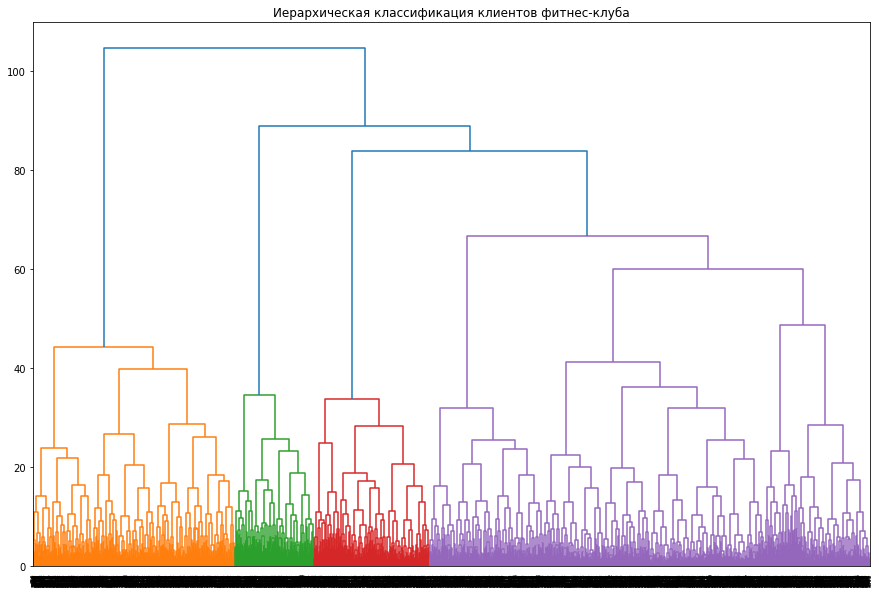

In [21]:
# Модель кластеризации
linked = linkage(X_st, method = 'ward') 
# Демонстрация дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая классификация клиентов фитнес-клуба')
plt.show() 

На основании полученной диаграммы мы можем выделить от 4 до 6 наполненных кластеров. Остановимся на 5 кластерах. Теперь мы можем обучить модель кластеризации.

### Обучение модели и прогноз кластера клиентов

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров мы приняли n=5. 

In [22]:
# Обучение модели
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
# Предсказание принадлежности к классу
labels = km.fit_predict(X_st) # применяем алгоритм к данным и формируем вектор кластеров 

### Анализ состава кластеров

Рассмотрим средние значения признаков для классов.

In [23]:
# Добавление столбца с номером кластера в таблицу с данными
data['label'] = labels
# Расчет средних значений признаков для классов
data.groupby(labels).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,frequency_difference,churn,label
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,-0.007266,0.027723,0
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,-0.130851,0.267532,1
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,-0.183137,0.443564,2
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,-0.234651,0.514263,3
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,-0.001840,0.068019,4


Дополним данные распределением признаков по классам для переменных contract_period, age, avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_total, avg_class_frequency_current_month, frequency_difference.

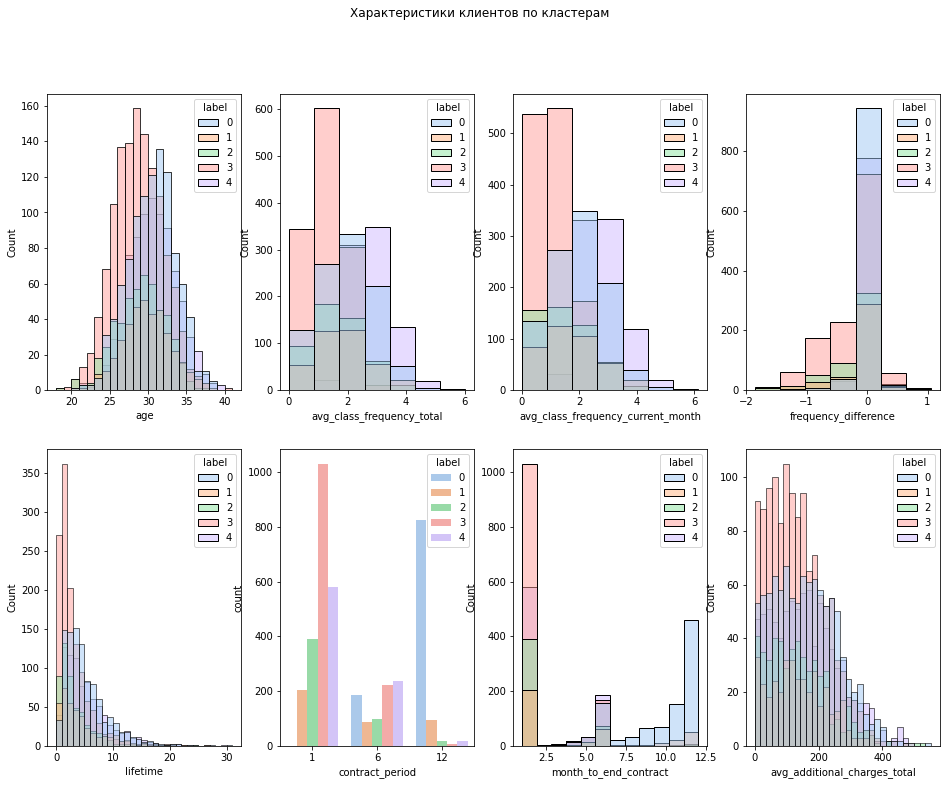

In [24]:
# Определение количества графиков, их расположения, размера фигуры
fig, axes = plt.subplots(2, 4, sharex=False, figsize=(16,12))

# Название графиков
fig.suptitle('Характеристики клиентов по кластерам')
# Построение графиков по общей таблице с данными
sns.histplot(ax=axes[0,0], x='age', hue='label', data=data, bins=23, palette='pastel')
sns.histplot(ax=axes[0,1], x='avg_class_frequency_total', hue='label', data=data, bins = 7, palette='pastel')
sns.histplot(ax=axes[0,2], x='avg_class_frequency_current_month', hue='label', data=data, bins = 7, palette='pastel')
sns.histplot(ax=axes[0,3], x='frequency_difference', hue='label', data=data, bins = 7, palette='pastel')

sns.histplot(ax=axes[1,0], x='lifetime', hue ='label', data=data, bins=31, palette='pastel')
sns.countplot(ax=axes[1,1], x='contract_period', hue='label', data=data, palette='pastel')
sns.histplot(ax=axes[1,2], x='month_to_end_contract', hue='label', data=data, bins=12, palette='pastel')
sns.histplot(ax=axes[1,3], x='avg_additional_charges_total', hue='label', data=data, palette='pastel') 

# Демонстрация графиков
plt.show()

Определим размеры кластеров

In [25]:
# Расчет долей по кластерам
data['label'].value_counts(normalize=True)

3    0.31550
0    0.25250
4    0.20950
2    0.12625
1    0.09625
Name: label, dtype: float64

Таблица и графики показывают: получившиеся кластеры серьезно отличаются. 
Кластеры можно охарактеризовать следующим образом. Выстроим кластеры по приверженности (лайфтайму) от самого маленького к самому большому. 
* `Редкий посетитель` (кластер 3, 32% от общего числа клиентов) 

Этот самый большой по объему кластер включает клиентов, живущих или работающих близко к клубу, однако они меньше других включены в социальные связи - на предприятиях-партнерах работает 35% клиентов, 24% участвуют в акции с друзьями, обычно заключают контракт на месяц, при этом посещают занятия редко - в среднем около 1 раза в неделю, реже других ходят на групповые программы(34%). 

Можно предположить, что связь клиента с клубом слабая, возможно у него нет привычки к регулярным занятиям, и внешней поддержки - друзья и коллеги в клубе, также недостает. 

* `Далекий гость` (кластер 2, 13% от общего числа клиентов) 

Этот кластер от других отличает работа и проживание в дали от клуба. Несмотря на то, что клиенты из этого кластера достаточно часто работают в предприятиях-партнерах(46%), они реже всего участвуют в акциях с друзьями (только 8%), реже всех кластеров участвуют в групповых программах (только 21%). Они чаще всего заключают контракты на 1 месяц, средняя частота посещения клуба - 1,7 раз в неделю. 

Можно предположить, что проживание и работа далеко от клуба является объективным барьером, мешающим клиентам чаще посещать клуб вообще и групповые программы в частности. 

* `Сомневающийся` (кластер 1, 10% от общего числа клиентов)

Этот кластер включает клиентов, которые также достаточно часто работают на предприятиях-партнерах (47%), участвуют в акции приведи друга (31%), но до сих пор держат дистанцию с клубом - не оставляют номер мобильного телефона, при этом достаточно активно участвуют в групповых программах (43%), чаще всего заключают месячные контракты, однако полугодовые и годовые также встречаются, их средний лайфтайм приближается к 4 месяцам, занимаются в среднем чуть меньше 2 раз в неделю.

Можно предположить, что клиента держат в клубе привычка к занятиям, удобство. 

* `Надежный партнер` (кластер 0, 25% от общего числа клиентов) 

Этот кластер включает клиентов - работников предприятий-партнеров (78%), участников акции приведи друга - 57%. Они активно участвуют в групповых занятиях(58%), чаще всего заключают годовые и полугодовые контракты, их средний лайфтайм выше 4 месяцев, а дополнительные траты выше среднего, занимаются достаточно регулярно - в среднем около 2 раз в неделю, стабильно, в последний месяц спада посещаемости нет. 

Можно предположить, что клиента держат в клубе максимальная удовлетворенность, социальные связи и удобство.

* `Индивидуальный спортсмен` (кластер 4, 21% от общего числа клиентов)

У клиентов из этого кластера самый высокий средний лайфтайм - около 5 месяцев. Среднее число посещений в неделю - около 3, в групповые программы включены 47% клиентов этого кластера. При этом их показатели работы в предприятиях-партнерах и участия в акции с друзьями - на уровне "редкого посетителя", то есть 36% и 23% соответственно. Их средние дополнительные расходы выше, чем в других группах, при этом чаще всего они заключают помесячные контракты, реже - полугодовые, годовые - совсем редко.

Можно предположить, что этих клиентов держит в клубе ориентация на занятия, регулярность тренировок, высокое желание поддерживать спортивный образ жизни.

Для каждого полученного кластера посчитаем долю оттока.

label
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

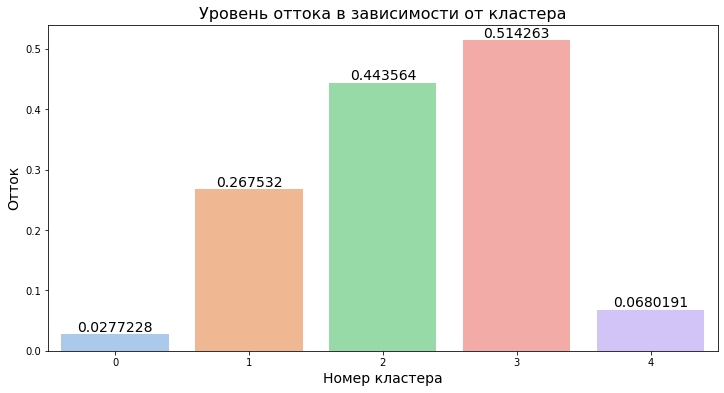

In [27]:
# Создание таблицы с информацией о пользователях по кластерам
churn_share = data['churn'].groupby(data['label']).mean()
# Показ таблицы
display(churn_share)
plt.figure(figsize=(12,6))
# Построение диаграммы
ax = sns.barplot(y= churn_share, x = churn_share.index, palette='pastel')
plt.title('Уровень оттока в зависимости от кластера', size=16)
plt.xlabel('Номер кластера', size=14)
plt.ylabel('Отток', size=14)
# Добавление подписей столбцов
ax.bar_label(ax.containers[0], label_type='edge', size=14)
plt.show()

Кластеры существенно отличаются по доле оттока. Кластеры 0 и 4 склонны к оттоку, кластеры 2 и 3 достаточно надежны, кластер 1 скорее надежен. 

**Вывод**

Построение дендрограммы и последующее использование метода k-means позволило разбить клиентов на 5 кластеров, существенно отличающихся между собой как по показателям активности, так и по уровню оттока. Клиентов 2 кластеров можно признать надежными, клиентов 2 - рисковыми, один кластер имееет промежуточный характер.

## Общий вывод

На основании данных клиентов клуба, мы подготовили модель прогнозирования оттока и принадлежности к кластеру. Эти результаты мжно внелрить в стратегию взаимодействия с клиентами и их удержания.
1. Больше лайфтайм - больше ценности

Основная аудитория клуба - люди, живущие и работающие поблизости. Этот ресурс небесконечен, необходимо сфокусировать маркетинговую активность на удержании клиентов. Сейчас в клубе ситуация сложная - при максимальном лайфтайме в 31 месяц (то есть клуб существует более 2 лет) средний лайфтайм даже в лояльных кластерах не превосходит полугода.Следует сосредоточиться на стимулировании заключения полугодовых и годовых контрактов, введении бонусов за непрерывное членство. 

Конкретные меры: 
- бонусы для клиентов при заключении контракта на 6 месяцев, 12 месяцев (10 месяцев оплачивается + 2 бесплатно),
- бонусы для клиентов за непрерывное членство (СПА, массаж, персональная тренировка),
- стенд "Наши герои" - с указанием суммарных минут, проведенных в спортзале с ежемесячным обновлением у рецепции (кто из клиентов за месяц, год, все время существования клуба занимался дольше всех).

2. Сила слабых связей
Все кластеры, кроме "Далеких гостей" и "Индивидуальных спортсменов" во многом мотивированы социальным взаимодействием внутри клуба. Следует стимулировать участие клиентов в групповых программах, занятия с друзьями, знакомыми, коллегами, внедрять новые формы командного взаимодействия в клубе. 

Конкретые меры: 
- продолжать акцию "Приведи друга",
- поддерживать и расширять круг предприятий-партнеров,
- проводить тематические недели - соревнования команд (Фитнес-эстафета, групповой жим и др.)


3. Дифференцируем предложения по кластерам
Использовать данные кластеризации при формировании специальных предложений, новых клиентов также распределять по кластерам. Можно адресно работать с конкретными кластерами:

- "Редкий посетитель" - основная задача - помочь освоиться и привести к регулярным посещениям - приглашения на групповые занятия, услуга "напоминание о тренировке",
- "Далекий гость" - специальные предложения в фитнес-кафе (работающие и живущие далеко клиенты могут быть голодными), предложения по парковке,
- "Сомневающийся" - стимулирование более частого посещения, вовлечение в тематические недели и соревнования,
- "Надежный партнер" - достаточно удовлетворенный клиент, надо стимулировать его приводить в клуб друзей и делиться с ними, в том числе в социальных медиа,
- "Индивидуальный спортсмен" - еще большее вовлечение в активности клуба, предложение сопутствующих услуг.

4. Работа с уходящими

По итогам месяца проводить мониторинг "уходящих" клиентов и формировать для них в зависимости от принадлежности к кластеру и лайфтайма в клубе предложение по продолжению сотрудничества с клубом:
- email с напоминанием о том, сколько клиент уже отзанимался,
- информация о интересных активностях на следующей неделе,
- возможность "заморозить" свой долгий абонемент на время отпуска/командировки. 

Надеемся, что вооруженные результатами машинного обучения, маркетологи и весь персонал сделают клуб привлекательнее для клиентов всех кластеров.